# 2.5 Local Methods in High Dimensions

We have examined two learning techniques for prediction so far: the stable
but biased linear model and the less stable but apparently less biased class
of k-nearest-neighbor estimates. It would seem that with a reasonably large
set of training data, we could always approximate the theoretically optimal
conditional expectation by k-nearest-neighbor averaging, since we should
be able to find a fairly large neighborhood of observations close to any x
and average them. This approach and our intuition breaks down in high
dimensions, and the phenomenon is commonly referred to as the __curse
of dimensionality__ (Bellman, 1961).

__Warning__: This is a hard topic but it is worth understanding it. 

## Build up the intuition for high dimensions

We will generate a dataset randomly for:

* one dimension: $x \in N(0, 3)$
* two dimension: $X \in N(0, \Sigma)$, where $\Sigma  = \begin{bmatrix} 3 &  0 \\ 0 &  3 \end{bmatrix}$

We want to understand: __how sparse it can go when dimension grows__. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='white')
from ch2_osl import OverviewSL
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['svg']

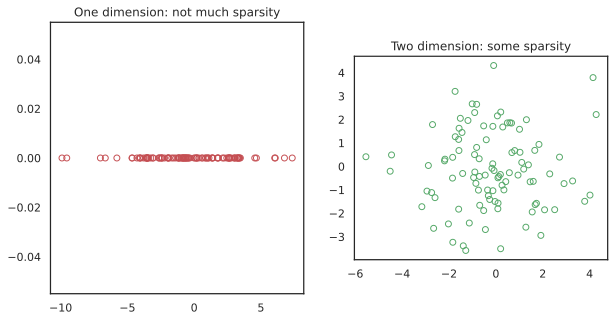

In [2]:
osl = OverviewSL()
osl.plot_sparsity()

The above figure illustrates our data is more sparse in the higher dimension
_when the sample size is same ($n=100$ in this case)_. The other side of __the
same coin__ is that the sampling density is alwasy small in high dimensions. Let's
define the sampling denstiy as the approximate number of points on each line
of lenght one. For example in 1d sampling density of 5 looks like this: 

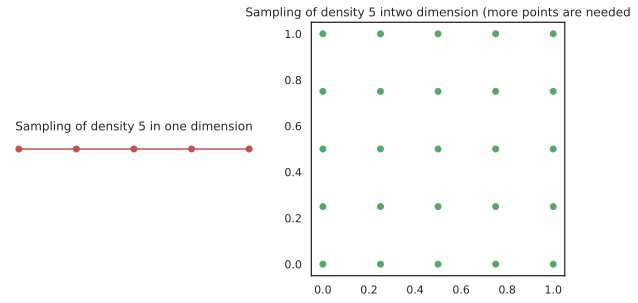

In [3]:
osl.plot_denstity_example()

## Volume of neighborhood

After having some intuition about sparsity and density in the space. We will 
try to understand what could go wrong in the high dimension. In __three__ dimension, 
the volume of cube with unit length $r$ is:

$$V(r) = r^3$$

In the $p$-dimension, the volume __hypercube__ with unit lenght $r$ is:

$$V(r) = r^p$$

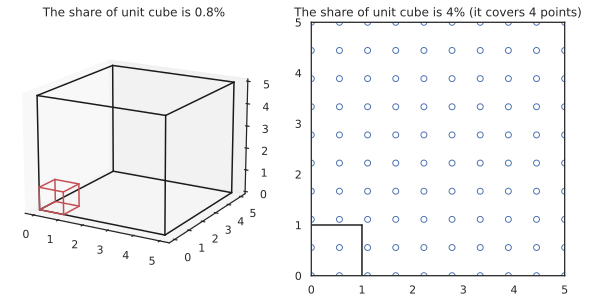

In [107]:
osl.plot_cube()

The above figure is _very important_. when you check the share of space that each unit take 
in different dimension, we have:

* $S(\text{two-dimension}) = \frac{1}{5\times5} = 0.04 = 4%$
* $S(\text{three-dimension} = \frac{1}{5 \times 5 \times 5} = 0.008 = 0.8%$

It seems that one standard unit takes a larger share in the two dimension.
However, things change dramatically when we try to _calculate the share of 
each unit and its nearest neighbors_. 

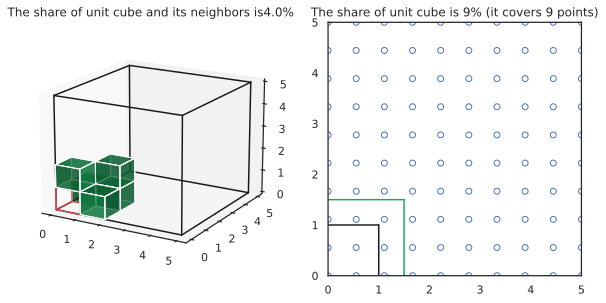

In [115]:
osl.plot_cube_neighbors()

For the three dimension, we see the growth:

* $0.8\% \to 3.2\%$, it __grows 5 times__
* $4\% \to 9\%$, it __grows 2.25 times__

In [116]:
4/0.8

5.0

In three dimension, 

osl.plot_denstity_example()